In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Landau(n, s0):
  n_dot = (s0*n) / (1.0 + n**2) - n
  return n_dot

def Khal(n0 = 0.1, s0f = 70):
  dt = 0.01
  num_steps = 1000
  s0 = s0f
  ns = np.empty(num_steps + 1)
  n_dots = np.empty(num_steps + 1)
  sinergs = np.empty(num_steps + 1)
  ns[0] = n0
  n_dots[0] = Landau(ns[0], s0)
  sinergs[0] = Sinerg(ns[0], s0)
  
  for i in range(num_steps):
    sinergs[i + 1] = Sinerg(ns[i], s0)
    n_dots[i + 1] = Landau(ns[i], s0)
    ns[i + 1] = ns[i] + (n_dots[i + 1] * dt)
  return ns, n_dots, sinergs

def Sinerg(n, s0):
  return 0.5* n - 0.5* s0 * np.log(1 + n ** 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while w

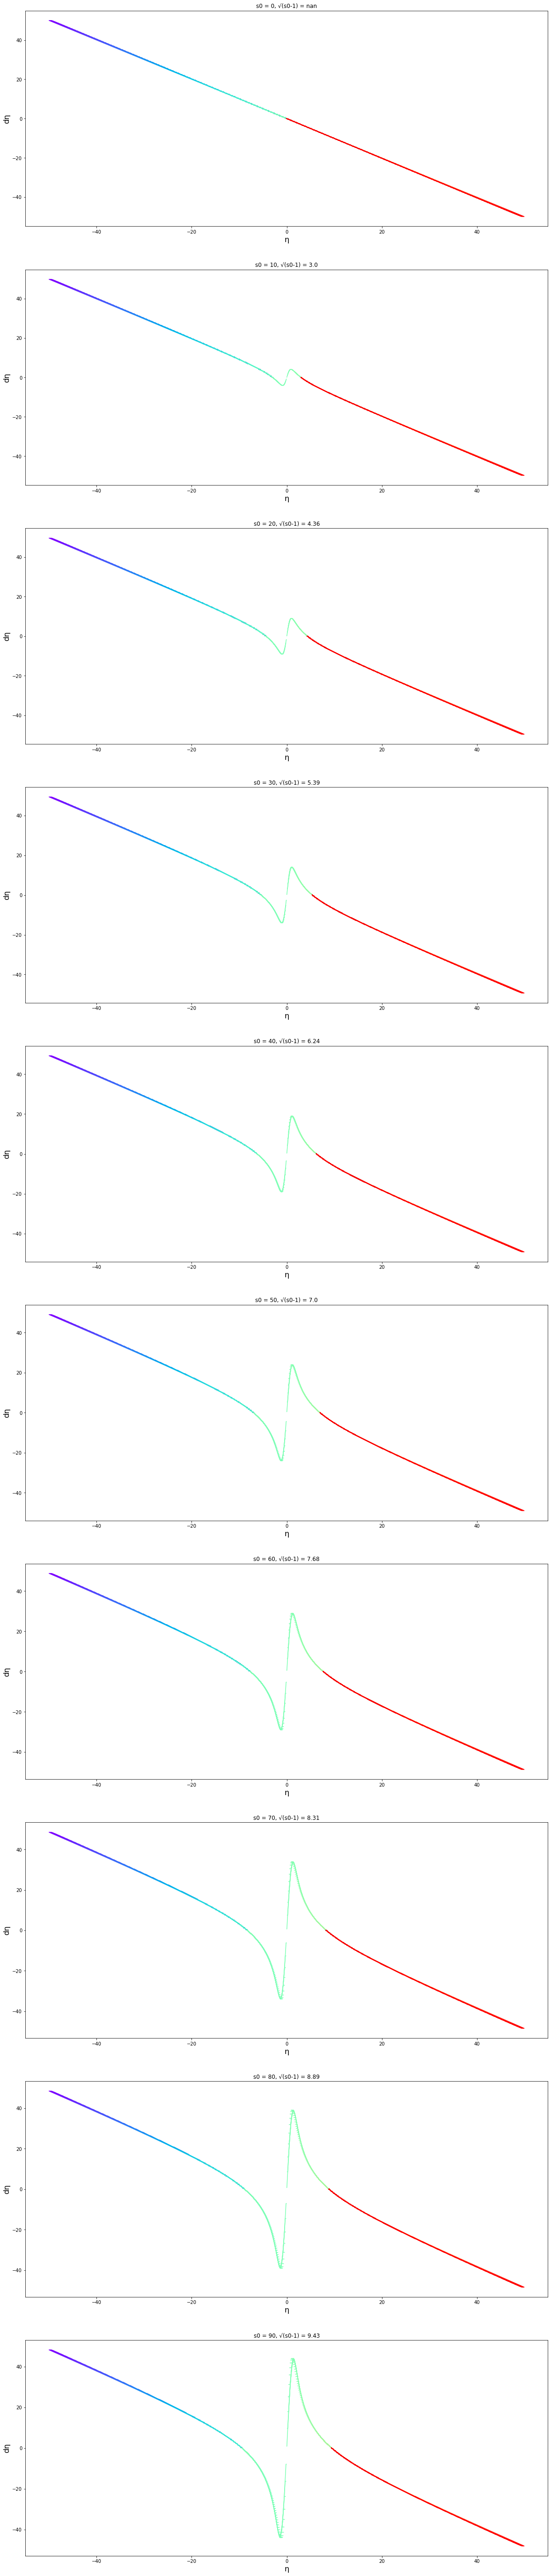

In [ ]:

from matplotlib.pyplot import cm
n = 1000
color = cm.rainbow(np.linspace(0, 1, n))
sps = 10
fig, axs = plt.subplots(sps, figsize=(20,100))
for j in range(sps):
  for i, c in zip(range(n), color):
    ns, n_dots, _ = Khal((i-500+0.1)/10., j*10)
    axs[j].set_title(f"s0 = {j*10}, √(s0-1) = {round(np.sqrt(j*10-1),2)}")
    axs[j].set_xlabel("η", fontsize=16)
    axs[j].set_ylabel("dη", fontsize=16)
    axs[j].plot(ns, n_dots, c=c)
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: 

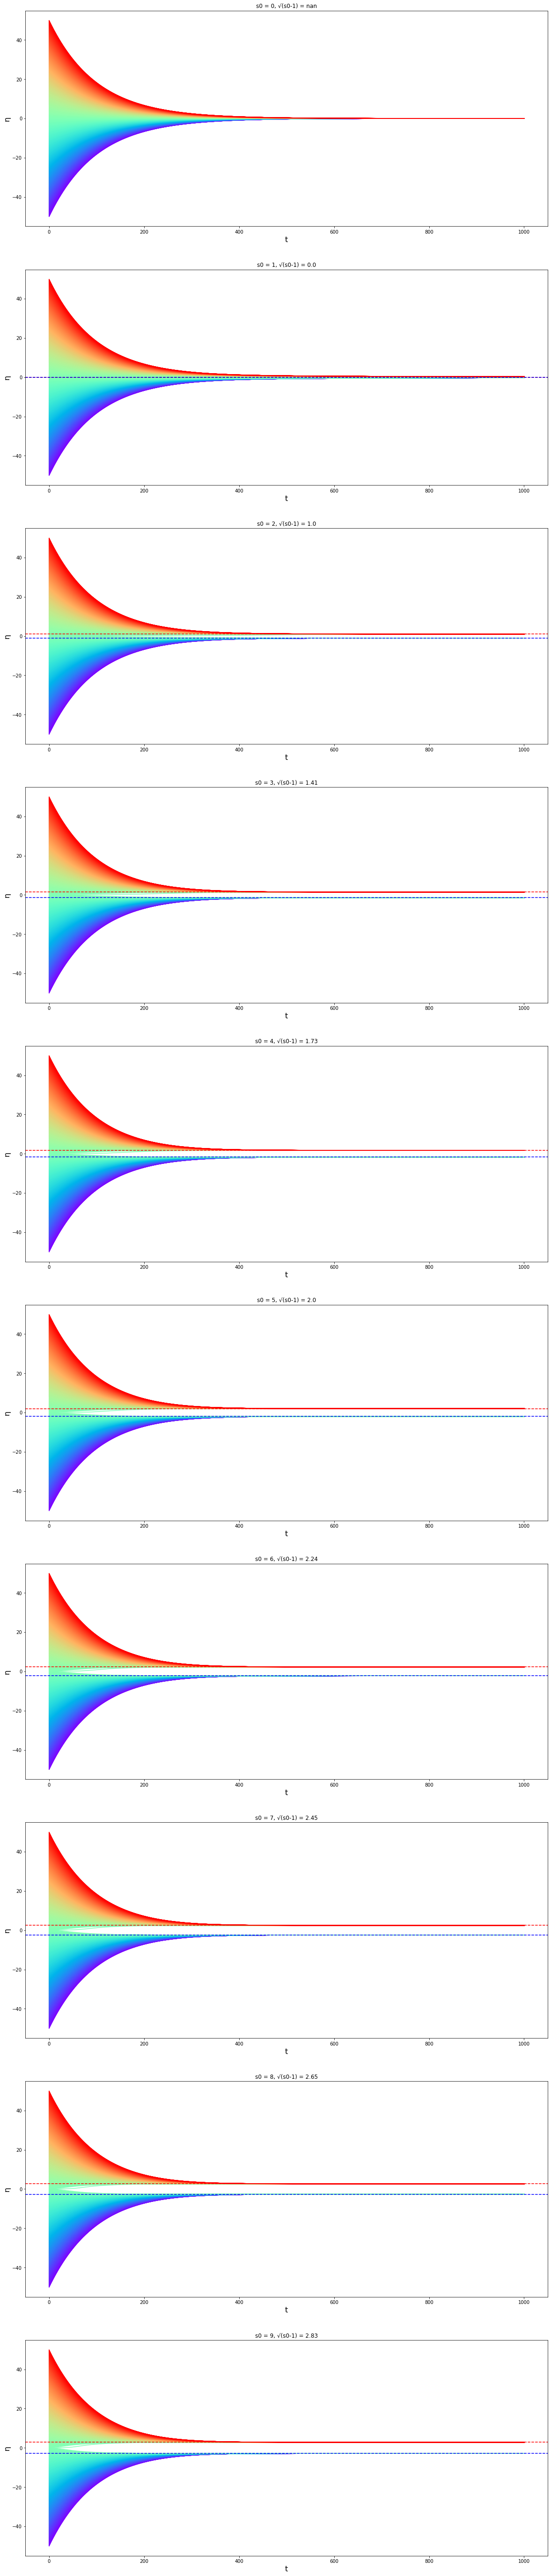

In [ ]:
n = 1000
color = cm.rainbow(np.linspace(0, 1, n))
sps = 10
fig, axs = plt.subplots(sps, figsize=(20,100))
for j in range(sps):
  for i, c in zip(range(n), color):
    ns, _, __ = Khal((i-500+0.1)/10., j)
    axs[j].set_title(f"s0 = {j}, √(s0-1) = {round(np.sqrt(j-1),2)}")
    axs[j].set_xlabel("t", fontsize=16)
    axs[j].set_ylabel("η", fontsize=16)
    axs[j].plot(ns, c=c)
  axs[j].axhline(y= np.sqrt(j-1), color='red', linestyle='--')
  axs[j].axhline(y= -np.sqrt(j-1), color='blue', linestyle='--')
fig.show()

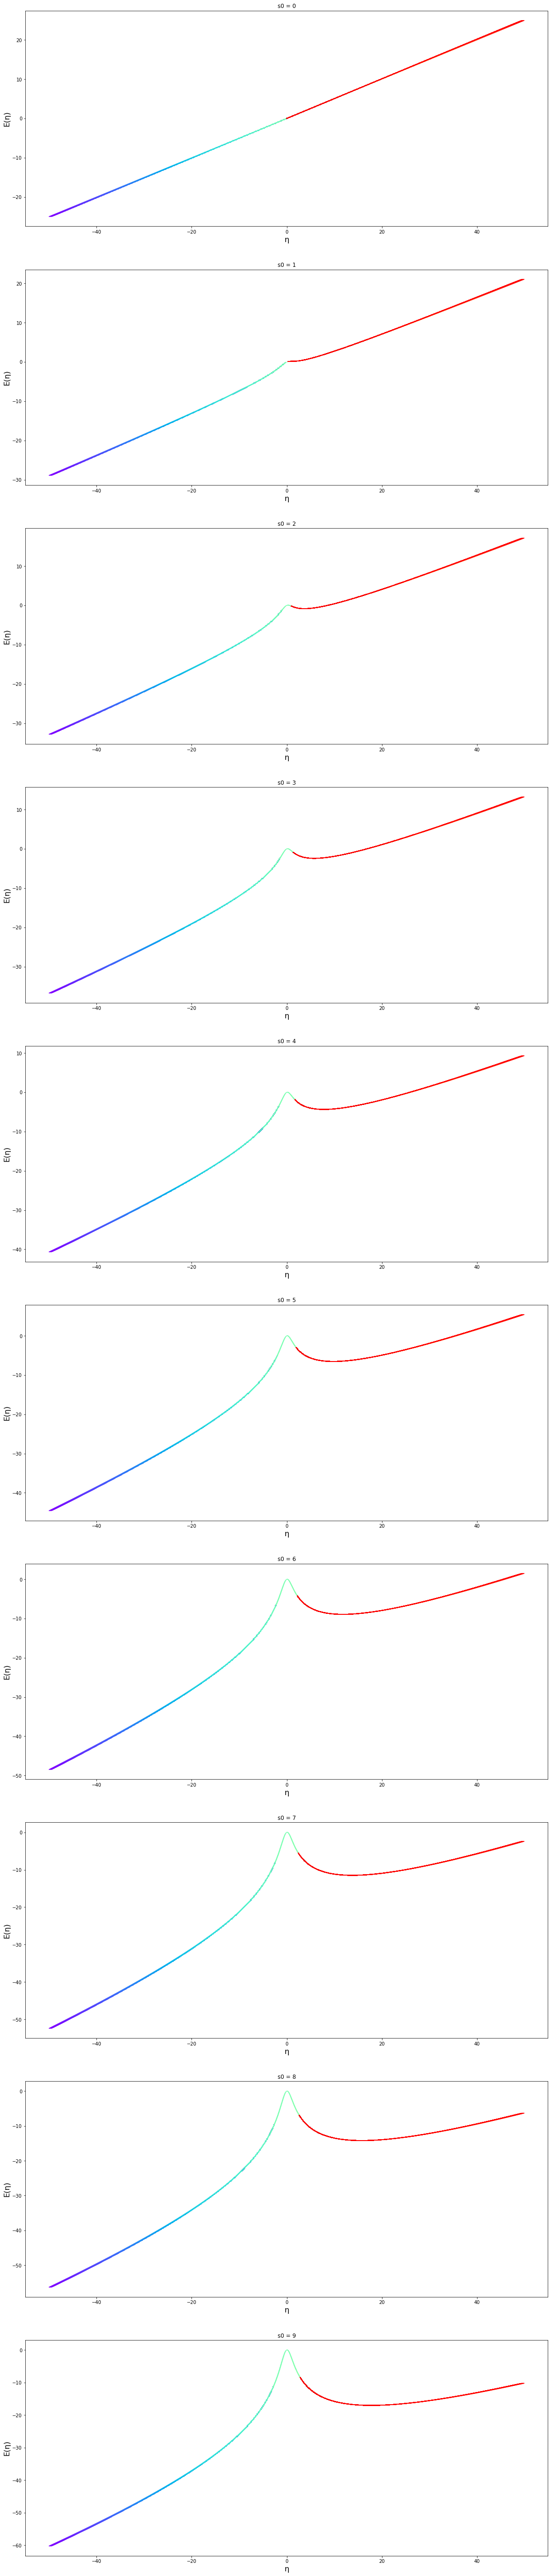

In [ ]:

n = 1000
color = cm.rainbow(np.linspace(0, 1, n))
sps = 10
fig, axs = plt.subplots(sps, figsize=(20,100))
for j in range(sps):
  for i, c in zip(range(n), color):
    ns, _, sinergs = Khal((i-500+0.1)/10., j)
    axs[j].set_title(f"s0 = {j}")
    axs[j].set_xlabel("η", fontsize=16)
    axs[j].set_ylabel("E(η)", fontsize=16)
    axs[j].plot(ns, sinergs, c=c)
fig.show()

In [ ]:
from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [ ]:
def LandauSDS(n, s0, In, Ih, Is, wiener):
  n_dot = Landau(n, s0) + ( np.sqrt(In) + ( np.sqrt(Ih) + np.sqrt(Is) ) / (1.0 + n**2)) * wiener
  return n_dot

def KhalSDS(n0 = 0.1, s0f = 70, In = 10., Ih = 112., Is = 2., deltaf = 2):
  dt = 0.01
  # Number of steps.
  num_steps = 1000
  #S0
  s0 = s0f
  #init Landau
  ns = np.empty(num_steps + 1)
  n_dots = np.empty(num_steps + 1)
  ns[0] = n0
  n_dots[0] = Landau(ns[0], s0)

  # The Wiener process parameter.
  delta = deltaf
  wieners = np.empty(n + 1)
  wieners[0] = 100
  brownian(wieners[0], num_steps, dt, delta, out = wieners[1:])
  for i in range(num_steps):
      n_dots[i + 1] = LandauSDS(ns[i], s0, In, Ih, Is, wieners[i + 1])
      ns[i + 1] = ns[i] + (n_dots[i+1] * dt)
  return ns, n_dots

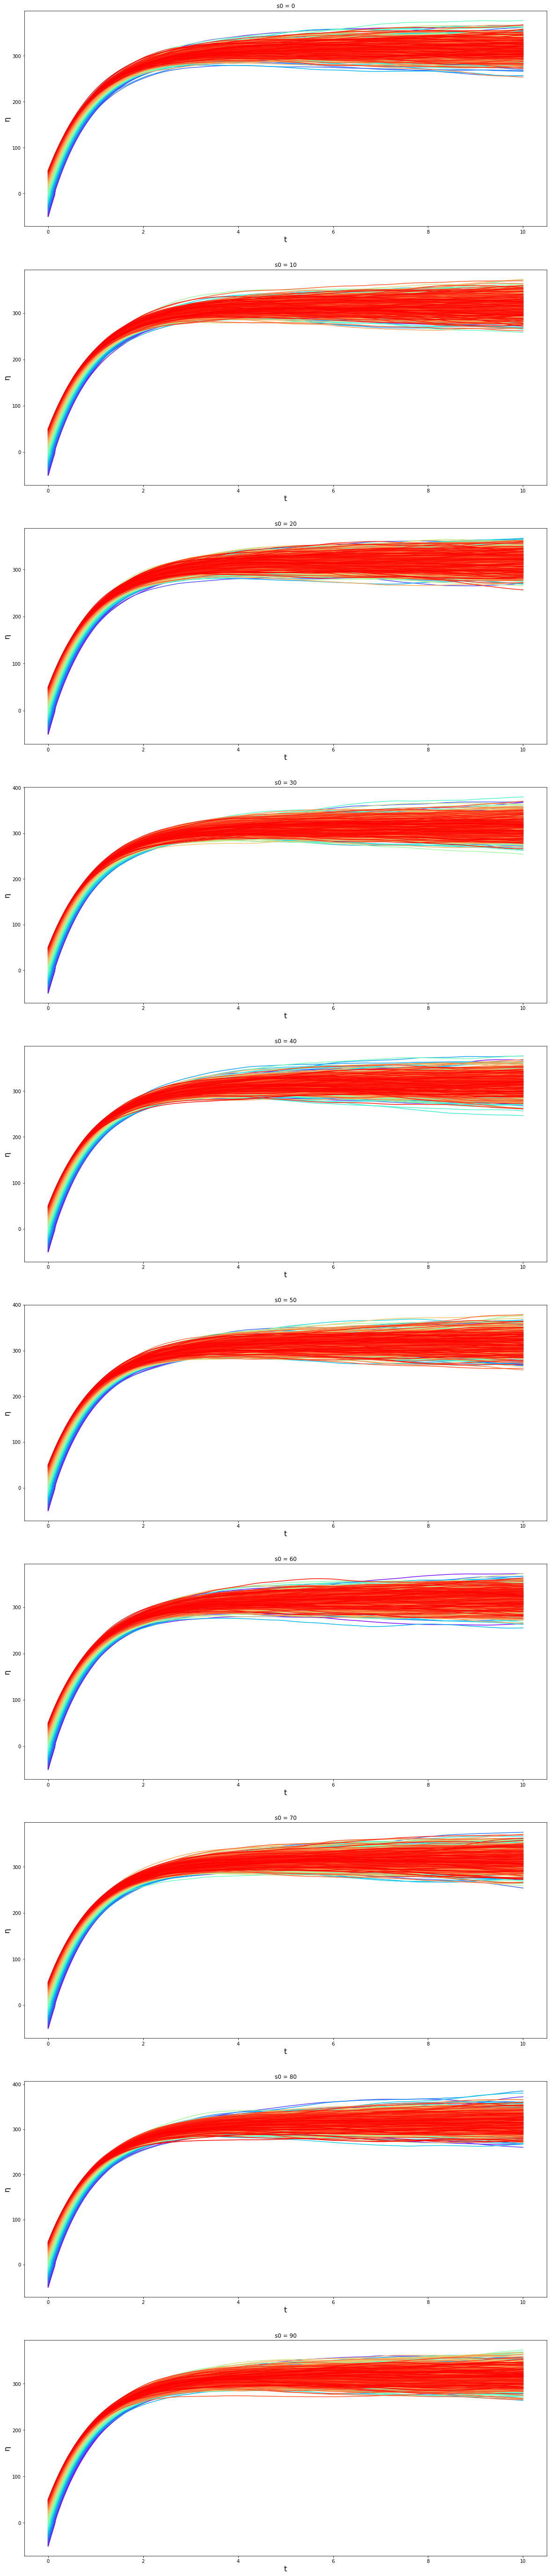

In [ ]:

n = 1000
dt = 0.01
t = np.linspace(0.0, n*dt, n+1)
color = cm.rainbow(np.linspace(0, 1, n))
sps = 10
fig, axs = plt.subplots(sps, figsize=(20,100))
for j in range(sps):
  for i, c in zip(range(n), color):
    ns, _ = KhalSDS((i-500+0.1)/10., j*10)
    axs[j].set_title(f"s0 = {j*10}")
    axs[j].set_xlabel("t", fontsize=16)
    axs[j].set_ylabel("η", fontsize=16)
    axs[j].plot(t, ns, c=c)
fig.show()